# **0. Setting up dependencies**

In [1]:
!nvidia-smi

Sat Aug 10 15:21:33 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.99                 Driver Version: 555.99         CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060      WDDM  |   00000000:01:00.0  On |                  N/A |
|  0%   46C    P8             16W /  170W |     754MiB /  12288MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import torch
cuda_available = torch.cuda.is_available()
print(f"CUDA available: {cuda_available}")

if cuda_available:
    num_gpus = torch.cuda.device_count()
    print(f"Number of GPUs available: {num_gpus}")
    
    for i in range(num_gpus):
        print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
    
    current_device = torch.cuda.current_device()
    print(f"Current GPU device: {current_device}")
    print(f"Current GPU device name: {torch.cuda.get_device_name(current_device)}")
else:
    print("No CUDA-enabled GPU detected.")

CUDA available: True
Number of GPUs available: 1
GPU 0: NVIDIA GeForce RTX 3060
Current GPU device: 0
Current GPU device name: NVIDIA GeForce RTX 3060


**Install and Import dependencies**

In [3]:
!pip install -Uqq fastai nbdev fastbook
!pip install --upgrade fastai sentencepiec

ERROR: Could not find a version that satisfies the requirement sentencepiec (from versions: none)
ERROR: No matching distribution found for sentencepiec


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string

from fastai.text.all import *

# **1. Importing data**

In [5]:
df = pd.read_csv("film_details.csv")
df

,Title,Category,Url,Metascore,Number_of_critic_reviewers,User_score,Number_of_user_reviewers,Plot_summary,Genres
0,Dekalog (1988),movie,https://www.metacritic.com/movie/dekalog-1988/,100,13,100,112,"This masterwork by Krzysztof Kieślowski is one of the twentieth century’s greatest achievements in visual storytelling. Originally made for Polish television, Dekalog focuses on the residents of a housing complex in late-Communist Poland, whose lives become subtly intertwined as they face emotional dilemmas that are at once deeply person...",['Drama']
1,The Godfather,movie,https://www.metacritic.com/movie/the-godfather/,100,16,100,4082,"Francis Ford Coppola's epic features Marlon Brando in his Oscar-winning role as the patriarch of the Corleone family. Director Coppola paints a chilling portrait of the Sicilian clan's rise and near fall from power in America, masterfully balancing the story between the Corleone's family life and the ugly crime business in which they are...","['Crime', 'Drama']"
2,Lawrence of Arabia (re-release),movie,https://www.metacritic.com/movie/lawrence-of-arabia-re-release/,100,8,100,442,"The 40th anniversary re-release of David Lean's 1962 masterpiece, starring Peter O'Toole in one of the most electrifying debuts in film history.","['Adventure', 'Biography', 'Drama', 'War']"
3,The Leopard (re-release),movie,https://www.metacritic.com/movie/the-leopard-re-release/,100,12,100,84,"Set in Sicily in 1860, Luchino Visconti's spectacular 1963 adaptation of Giuseppe di Lampedusa's international bestseller is one of the cinema's greatest evocations of the past, achingly depicting the passing of an ancient order. (Film Forum)","['Drama', 'History']"
4,The Conformist,movie,https://www.metacritic.com/movie/the-conformist-re-release/,100,11,100,105,"Set in Rome in the 1930s, this re-release of Bernardo Bertolucci's 1970 breakthrough feature stars Jean-Louis Trintignant as a Mussolini operative sent to Paris to locate and eliminate an old professor who fled Italy when the fascists came to power.",['Drama']
...,...,...,...,...,...,...,...,...,...
15149,Cavemen,tv,https://www.metacritic.com/tv/cavemen/,19,13,19,6,"Cavemen revolves around Joel, his younger brother Andy and best friend Nick. Joel is engaged to Kate. Even though he has some problems with her conservative parents accepting him, he is happy with his life and pursuing the American Dream. The pilot is based on the Geico commercials that claim their service is so easy, ""Even a caveman can...","['Comedy', 'Sci-Fi']"
15150,Work It,tv,https://www.metacritic.com/tv/work-it/,19,22,19,44,"After they are laid off, Lee Standish (Ben Koldyke) and Angel Ortiz (Amaury Nolasco) dress up as women to get new jobs as pharmaceutical sales wo(men).",['Comedy']
15151,Category 7: The End of the World,tv,https://www.metacritic.com/tv/category-7-the-end-of-the-world/,18,11,18,7,"""Category 7: The End of the World"" picks up where ""Category 6: Day of Destruction"" left off. The city of Chicago has been destroyed by a monstrous storm and as the storm gathers strength, it threatens to ravage the rest of the world. A television evangelist and his wife prey on the nation’s fears by broadcasting warnings of biblical pl...","['Action', 'Adventure', 'Drama', 'Sci-Fi', 'Thriller']"
15152,Stalker,tv,https://www.metacritic.com/tv/stalker/,17,24,17,137,"Lt. Beth Davis (Maggie Q) leads the Threat Assessment Unit of the Los Angeles Police Department that includes recent transfer Det. Jack Larsen (McDermott), Det. Ben Caldwell (Victor Rasuk), and Det. Janice Lawrence (Mariana Klaveno).","['Crime', 'Drama', 'Thriller']"


In [6]:
df.shape

(15154, 9)

In [7]:
genres_list = df["Genres"]
genres_list

0                                                     ['Drama']
1                                            ['Crime', 'Drama']
2                    ['Adventure', 'Biography', 'Drama', 'War']
3                                          ['Drama', 'History']
4                                                     ['Drama']
                                  ...                          
15149                                      ['Comedy', 'Sci-Fi']
15150                                                ['Comedy']
15151    ['Action', 'Adventure', 'Drama', 'Sci-Fi', 'Thriller']
15152                            ['Crime', 'Drama', 'Thriller']
15153                                                ['Comedy']
Name: Genres, Length: 15154, dtype: object

In [8]:
genres_list = df["Genres"]
type(genres_list[0])

str

In [9]:
genres_list = df.Genres.to_list()
genre_count = {}
for genres in genres_list:
  genre_list = eval(genres)
  for genre in genre_list:
    if genre in genre_count.keys():
      genre_count[genre] += 1
    else:
      genre_count[genre] = 1
print(f"Number of Genres: {len(genre_count)}")
print()
print(genre_count)

Number of Genres: 28

{'Drama': 9078, 'Crime': 2788, 'Adventure': 1998, 'Biography': 1306, 'War': 622, 'History': 902, 'Mystery': 2083, 'Romance': 2920, 'Thriller': 4005, 'Film-Noir': 31, 'Comedy': 5257, 'Musical': 356, 'Animation': 619, 'Family': 1036, 'Fantasy': 1522, 'Action': 2606, 'Western': 241, 'Music': 777, 'Documentary': 1354, 'Sport': 462, 'Sci-Fi': 1527, 'Horror': 1579, 'News': 28, '': 5, 'Unknown': 16, 'Reality-TV': 100, 'Talk-Show': 30, 'Game-Show': 30}


In [10]:
df.isna().sum()

Title                         0
Category                      0
Url                           0
Metascore                     0
Number_of_critic_reviewers    0
User_score                    0
Number_of_user_reviewers      0
Plot_summary                  0
Genres                        0
dtype: int64

In [11]:
df = df.dropna().reset_index(drop=True)

In [12]:
df.isna().sum()

Title                         0
Category                      0
Url                           0
Metascore                     0
Number_of_critic_reviewers    0
User_score                    0
Number_of_user_reviewers      0
Plot_summary                  0
Genres                        0
dtype: int64

In [13]:
df.shape

(15154, 9)

**Only using one category (first category) per film for now for single class classification.**

Will also do multi-label classification later

In [14]:
genre_list = []
indices_to_drop = []
for idx, genres in enumerate(df.Genres.to_list()):
  genres_list = eval(genres)
  if len(genres_list) != 0 and len(genres_list[0]) != 0:
    genre_list.append(genres_list[0])
  else:
    indices_to_drop.append(idx)

df = df.drop(indices_to_drop).reset_index(drop=True)
df.shape

(15149, 9)

In [15]:
# genre_list

In [16]:
indices_to_drop

[213, 2415, 8075, 8458, 14977]

In [17]:
df['Genre'] = genre_list
df

,Title,Category,Url,Metascore,Number_of_critic_reviewers,User_score,Number_of_user_reviewers,Plot_summary,Genres,Genre
0,Dekalog (1988),movie,https://www.metacritic.com/movie/dekalog-1988/,100,13,100,112,"This masterwork by Krzysztof Kieślowski is one of the twentieth century’s greatest achievements in visual storytelling. Originally made for Polish television, Dekalog focuses on the residents of a housing complex in late-Communist Poland, whose lives become subtly intertwined as they face emotional dilemmas that are at once deeply person...",['Drama'],Drama
1,The Godfather,movie,https://www.metacritic.com/movie/the-godfather/,100,16,100,4082,"Francis Ford Coppola's epic features Marlon Brando in his Oscar-winning role as the patriarch of the Corleone family. Director Coppola paints a chilling portrait of the Sicilian clan's rise and near fall from power in America, masterfully balancing the story between the Corleone's family life and the ugly crime business in which they are...","['Crime', 'Drama']",Crime
2,Lawrence of Arabia (re-release),movie,https://www.metacritic.com/movie/lawrence-of-arabia-re-release/,100,8,100,442,"The 40th anniversary re-release of David Lean's 1962 masterpiece, starring Peter O'Toole in one of the most electrifying debuts in film history.","['Adventure', 'Biography', 'Drama', 'War']",Adventure
3,The Leopard (re-release),movie,https://www.metacritic.com/movie/the-leopard-re-release/,100,12,100,84,"Set in Sicily in 1860, Luchino Visconti's spectacular 1963 adaptation of Giuseppe di Lampedusa's international bestseller is one of the cinema's greatest evocations of the past, achingly depicting the passing of an ancient order. (Film Forum)","['Drama', 'History']",Drama
4,The Conformist,movie,https://www.metacritic.com/movie/the-conformist-re-release/,100,11,100,105,"Set in Rome in the 1930s, this re-release of Bernardo Bertolucci's 1970 breakthrough feature stars Jean-Louis Trintignant as a Mussolini operative sent to Paris to locate and eliminate an old professor who fled Italy when the fascists came to power.",['Drama'],Drama
...,...,...,...,...,...,...,...,...,...,...
15144,Cavemen,tv,https://www.metacritic.com/tv/cavemen/,19,13,19,6,"Cavemen revolves around Joel, his younger brother Andy and best friend Nick. Joel is engaged to Kate. Even though he has some problems with her conservative parents accepting him, he is happy with his life and pursuing the American Dream. The pilot is based on the Geico commercials that claim their service is so easy, ""Even a caveman can...","['Comedy', 'Sci-Fi']",Comedy
15145,Work It,tv,https://www.metacritic.com/tv/work-it/,19,22,19,44,"After they are laid off, Lee Standish (Ben Koldyke) and Angel Ortiz (Amaury Nolasco) dress up as women to get new jobs as pharmaceutical sales wo(men).",['Comedy'],Comedy
15146,Category 7: The End of the World,tv,https://www.metacritic.com/tv/category-7-the-end-of-the-world/,18,11,18,7,"""Category 7: The End of the World"" picks up where ""Category 6: Day of Destruction"" left off. The city of Chicago has been destroyed by a monstrous storm and as the storm gathers strength, it threatens to ravage the rest of the world. A television evangelist and his wife prey on the nation’s fears by broadcasting warnings of biblical pl...","['Action', 'Adventure', 'Drama', 'Sci-Fi', 'Thriller']",Action
15147,Stalker,tv,https://www.metacritic.com/tv/stalker/,17,24,17,137,"Lt. Beth Davis (Maggie Q) leads the Threat Assessment Unit of the Los Angeles Police Department that includes recent transfer Det. Jack Larsen (McDermott), Det. Ben Caldwell (Victor Rasuk), and Det. Janice Lawrence (Mariana Klaveno).","['Crime', 'Drama', 'Thriller']",Crime


In [18]:
df['Genre'].value_counts()

Genre
Comedy         3837
Drama          3470
Action         2437
Documentary    1353
Crime          1199
Biography       825
Adventure       632
Animation       605
Horror          526
Fantasy          63
Reality-TV       48
Thriller         34
Mystery          33
Game-Show        20
Sci-Fi           14
Romance          11
Family           10
Musical           7
Unknown           6
Music             5
Western           4
Film-Noir         4
Talk-Show         2
War               1
History           1
Sport             1
News              1
Name: count, dtype: int64

# Removing rare genres

Rare genres are the genres that has less than 1% frequency in the entire genre count

**Searching for rare genre names**

In [19]:
genre_count = df['Genre'].value_counts()
threshold = int(len(df) * 0.01)
rare_genres = [ cat for cat, count in genre_count.items() if count < threshold]
len(rare_genres), rare_genres[:5]

(18, ['Fantasy', 'Reality-TV', 'Thriller', 'Mystery', 'Game-Show'])

In [20]:
rare_indices_to_drop = [idx for idx, row in df.iterrows() if row['Genre'] in rare_genres]
len(rare_indices_to_drop)

265

**Filtering out rare genre names**

In [21]:
df = df.drop(rare_indices_to_drop).reset_index(drop=True)
df.shape

(14884, 10)

In [22]:
df['Genre'].value_counts()

Genre
Comedy         3837
Drama          3470
Action         2437
Documentary    1353
Crime          1199
Biography       825
Adventure       632
Animation       605
Horror          526
Name: count, dtype: int64

In [23]:
len(df['Genre'].value_counts())

9

In [24]:
df.describe(include='object')

,Title,Category,Url,Plot_summary,Genres,Genre
count,14884,14884,14884,14884,14884,14884
unique,14253,2,14824,14822,1746,9
top,Robin Hood,movie,https://www.metacritic.com/movie/the-professionals/,"Val, a hard-working live-in housekeeper in modern day Sao Paulo, is perfectly content to take care of every one of her wealthy employers’ needs, from cooking and cleaning to being a surrogate mother to their teenage son, who she has raised since he was a toddler. But when Val’s estranged daughter Jessica suddenly shows up the unspoken bu...",['Drama'],Comedy
freq,4,12403,2,2,1063,3837


In [25]:
#Data preprocessing

In [26]:
desc = df.Plot_summary[0]
desc

'This masterwork by Krzysztof Kieślowski is one of the twentieth century’s greatest achievements in visual storytelling. Originally made for Polish television, Dekalog focuses on the residents of a housing complex in late-Communist Poland, whose lives become subtly intertwined as they face emotional dilemmas that are at once deeply person...'

In [27]:
desc = df.Plot_summary[0]
desc[:100]

'This masterwork by Krzysztof Kieślowski is one of the twentieth century’s greatest achievements in v'

# **2. Data preprocessing**

# Using default Fastai's tokenizer along with Spacy

The rules are all listed below, here is the meaning of the special tokens || [Documentaion](https://fastai1.fast.ai/text.transform.html) ||

- **BOS (xxbos)** => Indicates the beginning of a text <br/>
- **UNK (xxunk)** => Indicates the word is unknown <br/>
- **PAD (xxpad)** => Token used for padding <br/>
- **FLD (xxfld)** => Used to separate the different fields of texts <br/>
- **TK_MAJ (xxmaj)** => Indicates the next word begins with a capital <br/>
- **TK_REP (xxrep)** => Indicate the next character is repeated n times in the original text <br/>
- **TK_UP (xxup)** => Indicate the next word is written in all caps in the original text <br/>
- **TK_WREP(xxwrep)** => Indicate the next word is repeated n times in the original text <br/>

In [28]:
spacy = SpacyTokenizer()
tokenizer = Tokenizer(spacy)


print(coll_repr(tokenizer(desc[:100]), 25))

(#20) ['xxbos','xxmaj','this','masterwork','by','xxmaj','krzysztof','xxmaj','kieślowski','is','one','of','the','twentieth','century','’s','greatest','achievements','in','v']


In [29]:
x = tokenizer(desc[:100])
x

(#20) ['xxbos','xxmaj','this','masterwork','by','xxmaj','krzysztof','xxmaj','kieślowski','is'...]

In [30]:
for i in x:
    print(i)

xxbos
xxmaj
this
masterwork
by
xxmaj
krzysztof
xxmaj
kieślowski
is
one
of
the
twentieth
century
’s
greatest
achievements
in
v


```defaults.text_proc_rules # Adds these process to tokenization by default```


- <function fastai.text.core.fix_html(x)>,
- <function fastai.text.core.replace_rep(t)>,
- <function fastai.text.core.replace_wrep(t)>,
- <function fastai.text.core.spec_add_spaces(t)>,
- <function fastai.text.core.rm_useless_spaces(t)>,
- <function fastai.text.core.replace_all_caps(t)>,
- <function fastai.text.core.replace_maj(t)>,
- <function fastai.text.core.lowercase(t, add_bos=True, add_eos=False)>

<br/>

- **fix_html** => Replaces special HTML characters with a readable version <br/>
- **replace_rep** => Replaces any character repeated three times or more with a special token for repetition (xxrep), the number of times it's repeated, then the character <br/>
- **replace_wrep** => Replaces any word repeated three times or more with a special token for word repetition (xxwrep), the number of times it's repeated, then the word <br/>
- **spec_add_spaces** => Adds spaces around / and # <br/>
- **rm_useless_spaces** => Removes all repetitions of the space character <br/>
- **replace_all_caps** => Lowercases a word written in all caps and adds a special token for all caps (xxup) in front of it <br/>
- **replace_maj** => Lowercases a capitalized word and adds a special token for capitalized (xxmaj) in front of it <br/>
- **lowercase** => Lowercases all text and adds a special token at the beginning (xxbos) and/or the end (xxeos) <br/>

In [31]:
doc(SentencePieceTokenizer)

[Documentaion](https://docs.fast.ai/text.core.html)


```SentencePieceTokenizer is particularly useful in NLP tasks that require handling a large and diverse vocabulary, providing a robust way to convert text into a numerical format```

In [32]:
def subword(vocab_size):
  sp_tokenizer = SentencePieceTokenizer(vocab_sz=vocab_size) 
  sp_tokenizer.setup(corpus) # Created corpus to create subword vocabulary
  return " ".join(first(sp_tokenizer([desc])))

In [33]:
corpus = df["Plot_summary"]
#corpus

word_dict = {}

for i in corpus:
    x = tokenizer(i)
    for j in x:
        if j not in word_dict:
            word_dict[j] = 1
        else:
            word_dict[j] += 1



voc_list = list(word_dict.keys())
len(voc_list)

38754

In [34]:
puncs = string.punctuation

tag_list = ["xxbos","xxunk","xxpad","xxfld","xxmaj","xxrep","xxup","xxwrep"]

removed = []
words = []

for i in voc_list:
    if i not in tag_list and i not in puncs:
        words.append(i)
    else:
        removed.append(i)

total_word = len(words)
print(total_word)

38727


In [35]:
print(removed)
print()
print(len(removed))

['xxbos', 'xxmaj', '.', ',', '-', '(', ')', ':', '?', '/', 'xxup', '"', '$', 'xxrep', '[', ']', '!', ';', "'", '&', '+', '%', '#', '*', '=', '>', '@']

27


**Since the dictionary is being saved based on character frequency (sorted), experimenting with different vocabulary sizes and finally the original vocab size of the corpus**



In [36]:
subword(500)

'▁T hi s ▁ma s ter w or k ▁by ▁K r z y s z t o f ▁K ie ś l ow s k i ▁is ▁one ▁of ▁the ▁t w ent ie th ▁c ent ur y ’ s ▁gr e ate st ▁a ch ie ve ment s ▁in ▁ vi s u al ▁story t ell ing . ▁O ri g in ally ▁ma d e ▁for ▁P ol ish ▁ te le vi s ion , ▁D e k al o g ▁f o c us es ▁on ▁the ▁re s id ent s ▁of ▁a ▁h ous ing ▁comp le x ▁in ▁l ate - C om m un ist ▁P o land , ▁who se ▁l ive s ▁become ▁su b t ly ▁in ter t w in ed ▁as ▁the y ▁fa ce ▁ em o t ion al ▁di le m ma s ▁that ▁are ▁at ▁on ce ▁de ep ly ▁p er son ...'

In [37]:
print(subword(500))

▁T hi s ▁ma s ter w or k ▁by ▁K r z y s z t o f ▁K ie ś l ow s k i ▁is ▁one ▁of ▁the ▁t w ent ie th ▁c ent ur y ’ s ▁gr e ate st ▁a ch ie ve ment s ▁in ▁ vi s u al ▁story t ell ing . ▁O ri g in ally ▁ma d e ▁for ▁P ol ish ▁ te le vi s ion , ▁D e k al o g ▁f o c us es ▁on ▁the ▁re s id ent s ▁of ▁a ▁h ous ing ▁comp le x ▁in ▁l ate - C om m un ist ▁P o land , ▁who se ▁l ive s ▁become ▁su b t ly ▁in ter t w in ed ▁as ▁the y ▁fa ce ▁ em o t ion al ▁di le m ma s ▁that ▁are ▁at ▁on ce ▁de ep ly ▁p er son ...


In [38]:
subword(1000)

'▁This ▁ma ster work ▁by ▁K r z y s z t o f ▁K ie ś low s k i ▁is ▁one ▁of ▁the ▁t w ent ie th ▁century ’ s ▁great est ▁a ch ie ve ment s ▁in ▁v is u al ▁story t ell ing . ▁O ri g in ally ▁ma d e ▁for ▁P ol ish ▁t e le vi s ion , ▁De k al o g ▁focuse s ▁on ▁the ▁re s ident s ▁of ▁a ▁h ous ing ▁comp le x ▁in ▁l ate - C om m un ist ▁P o land , ▁who se ▁lives ▁become ▁su b t ly ▁in ter t w in ed ▁as ▁they ▁face ▁emotional ▁di le m ma s ▁that ▁are ▁at ▁on ce ▁de ep ly ▁p er son ...'

In [39]:
subword(10000)

'▁This ▁master work ▁by ▁K r zy s z t of ▁Ki e ś l owski ▁is ▁one ▁of ▁the ▁t w ent ie th ▁century ’ s ▁greatest ▁a chievement s ▁in ▁visual ▁storytelling . ▁Originally ▁made ▁for ▁Pol ish ▁television , ▁De k al og ▁focuse s ▁on ▁the ▁residents ▁of ▁a ▁hous ing ▁complex ▁in ▁late - Co mm un ist ▁Poland , ▁who se ▁lives ▁become ▁sub t ly ▁intertwined ▁as ▁they ▁face ▁emotional ▁dilemma s ▁that ▁are ▁at ▁once ▁deeply ▁person ...'

In [40]:
subword(1000000)

'▁This ▁master work ▁by ▁K rzy sz t of ▁Kieślowski ▁is ▁one ▁of ▁the ▁twentieth ▁century ’ s ▁greatest ▁achievements ▁in ▁visual ▁storytelling . ▁Originally ▁made ▁for ▁Pol ish ▁television , ▁Dek alog ▁focuse s ▁on ▁the ▁residents ▁of ▁a ▁hous ing ▁complex ▁in ▁late - Communist ▁Poland , ▁who se ▁lives ▁become ▁subtl y ▁intertwined ▁as ▁they ▁face ▁emotional ▁dilemmas ▁that ▁are ▁at ▁once ▁deeply ▁person ...'

In [41]:
subword(total_word)

'▁This ▁master work ▁by ▁K rzy sz t of ▁Kieślowski ▁is ▁one ▁of ▁the ▁twentieth ▁century ’ s ▁greatest ▁achievements ▁in ▁visual ▁storytelling . ▁Originally ▁made ▁for ▁Pol ish ▁television , ▁Dek alog ▁focuse s ▁on ▁the ▁residents ▁of ▁a ▁hous ing ▁complex ▁in ▁late - Communist ▁Poland , ▁who se ▁lives ▁become ▁subtl y ▁intertwined ▁as ▁they ▁face ▁emotional ▁dilemmas ▁that ▁are ▁at ▁once ▁deeply ▁person ...'

# Numericalization

**Process of mapping tokens into integers. We use the vocabulary index to map this.**

In [42]:
doc(Numericalize)

In [43]:
tokens = corpus.map(tokenizer)
tokens

0                                                  [xxbos, xxmaj, this, masterwork, by, xxmaj, krzysztof, xxmaj, kieślowski, is, one, of, the, twentieth, century, ’s, greatest, achievements, in, visual, storytelling, ., xxmaj, originally, made, for, xxmaj, polish, television, ,, xxmaj, dekalog, focuses, on, the, residents, of, a, housing, complex, in, late, -, communist, xxmaj, poland, ,, whose, lives, become, subtly, intertwined, as, they, face, emotional, dilemmas, that, are, at, once, deeply, person, …]
1        [xxbos, xxmaj, francis, xxmaj, ford, xxmaj, coppola, 's, epic, features, xxmaj, marlon, xxmaj, brando, in, his, xxmaj, oscar, -, winning, role, as, the, patriarch, of, the, xxmaj, corleone, family, ., xxmaj, director, xxmaj, coppola, paints, a, chilling, portrait, of, the, xxmaj, sicilian, clan, 's, rise, and, near, fall, from, power, in, xxmaj, america, ,, masterfully, balancing, the, story, between, the, xxmaj, corleone, 's, family, life, and, the, ugly, crime, business, i

In [44]:
num = Numericalize()
num.setup(tokens)

coll_repr(num.vocab,20)

"(#15808) ['xxunk','xxpad','xxbos','xxeos','xxfld','xxrep','xxwrep','xxup','xxmaj','the',',','a','.','of','and','to','in','(',')','-'...]"

**Text vs Tokens Vs Encodings**

In [45]:
print("Text")
print()
print(corpus[0])
print()
print(len(corpus[0]))

print()
print("==============================================================================")
print()

print("Tokens")
print()
print(tokens[0])
print()
print(len(tokens[0]))

print()
print("==============================================================================")
print()

print("Encodings")
print()
print(num(tokens[0]))
print()
print(len(num(tokens[0])))

print()
print("==============================================================================")
print()

nums = num(tokens[0])
print("Decodings")
print()
decoded = ' '.join(num.vocab[o] for o in nums)
print(decoded)
print()
print(len(decoded))

Text

This masterwork by Krzysztof Kieślowski is one of the twentieth century’s greatest achievements in visual storytelling. Originally made for Polish television, Dekalog focuses on the residents of a housing complex in late-Communist Poland, whose lives become subtly intertwined as they face emotional dilemmas that are at once deeply person...

342


Tokens

['xxbos', 'xxmaj', 'this', 'masterwork', 'by', 'xxmaj', 'krzysztof', 'xxmaj', 'kieślowski', 'is', 'one', 'of', 'the', 'twentieth', 'century', '’s', 'greatest', 'achievements', 'in', 'visual', 'storytelling', '.', 'xxmaj', 'originally', 'made', 'for', 'xxmaj', 'polish', 'television', ',', 'xxmaj', 'dekalog', 'focuses', 'on', 'the', 'residents', 'of', 'a', 'housing', 'complex', 'in', 'late', '-', 'communist', 'xxmaj', 'poland', ',', 'whose', 'lives', 'become', 'subtly', 'intertwined', 'as', 'they', 'face', 'emotional', 'dilemmas', 'that', 'are', 'at', 'once', 'deeply', 'person', '…']

64


Encodings

TensorText([    2,     8,    3

# **3. Language Modeling**

**Prepping data for LMs**

In [46]:
# dls_lm = TextDataLoaders.from_df(df, text_col='Plot_summary',is_lm=True, 
#                                  bs=16,  # batch size
#                                  seq_len=512, # maximum sequence length
#                                  splitter = RandomSplitter(valid_pct=0.1, seed=42))

In [47]:
dls_lm = TextDataLoaders.from_df(df, 
                              text_col = 'Plot_summary', 
                              label_col = 'Genre', 
                              bs = 16, 
                              seq_len = 512, 
                              splitter = RandomSplitter(valid_pct=0.1, seed=42))

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `n_workers` has to be changed to 0 to avoid getting stuck


In [48]:
dls_lm.show_batch(max_n=3)

,text,category
0,"xxbos xxmaj the night shift at xxmaj san xxmaj antonio xxmaj memorial includes manager xxmaj michael xxmaj xxunk ( freddy xxmaj rodriguez ) , xxmaj afghanistan vet xxmaj dr . xxup xxunk xxmaj callahan ( xxunk xxmaj xxunk ) , xxmaj dr . xxmaj jordan xxmaj alexander ( jill xxmaj flint ) , xxmaj dr . xxmaj xxunk xxmaj xxunk ( ken xxmaj leung ) , xxmaj dr . xxmaj drew xxmaj xxunk ( brendan xxmaj fehr ) , xxmaj dr . xxmaj landry de la xxmaj cruz ( xxunk xxmaj alonso ) , resident xxmaj paul xxmaj cummings ( robert xxmaj bailey xxmaj jr . ) , nurse xxmaj kenny ( jr xxmaj xxunk …",Drama
1,"xxbos xxmaj during xxmaj world xxmaj war xxup ii in 1941 , xxmaj lt . xxmaj david xxmaj xxunk ( connor xxmaj xxunk ) , xxmaj lt . xxmaj robert xxmaj blair ‘ paddy ’ xxmaj xxunk ( jack o’connell ) and xxmaj lt . xxmaj john ‘ jock ’ xxmaj xxunk ( alfie xxmaj allen ) are some of the soldiers who formed the xxmaj british xxmaj army 's xxmaj special xxmaj air xxmaj service ( sas ) in xxmaj steven xxmaj knight 's adaptation of xxmaj ben xxunk 's book "" sas : xxmaj rogue xxmaj heroes . "" [ premieres in the xxup uk unde …",Action
2,"xxbos xxmaj now that xxmaj greg xxmaj xxunk ( stiller ) is "" in "" with his soon - to - be in - laws , xxmaj jack ( de xxmaj niro ) and xxmaj dina ( danner ) xxmaj xxunk , it looks like smooth sailing for him and his fiancée , xxmaj pam ( polo ) . xxmaj but that 's before xxmaj pam 's parents meet xxmaj greg 's parents , xxmaj bernie and xxmaj xxunk xxmaj xxunk ( hoffman and xxmaj streisand ) . xxmaj the hyper - relaxed xxmaj xxunk and the tightly - wound xxmaj xxunk are xxunk …",Comedy


In [50]:
torch.save(dls_lm, "dataloaders/lm_dls.pkl")

In [51]:
dls_lm = torch.load("dataloaders/lm_dls.pkl")

**Modeling**

In [52]:
print(doc(AWD_LSTM)) #A pretrained LSTM model on Wikipedia Corpus
print(doc(language_model_learner))
print(doc(Perplexity))

None


None


None


In [53]:
# learner = language_model_learner(
#     dls_lm,     # Dataloader
#     AWD_LSTM,   # Architecture of the language model I want to use
#     drop_mult=0.3, # Dropout rates in the mode
#     metrics=[accuracy, Perplexity()]).to_fp16()

In [54]:
learner = text_classifier_learner(
                                dls_lm, 
                                AWD_LSTM, 
                                drop_mult=0.5, 
                                metrics=[accuracy, Perplexity()]).to_fp16()

In [55]:
learner.model

SequentialRNN(
  (0): SentenceEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(15808, 400, padding_idx=1)
      (encoder_dp): EmbeddingDropout(
        (emb): Embedding(15808, 400, padding_idx=1)
      )
      (rnns): ModuleList(
        (0): WeightDropout(
          (module): LSTM(400, 1152, batch_first=True)
        )
        (1): WeightDropout(
          (module): LSTM(1152, 1152, batch_first=True)
        )
        (2): WeightDropout(
          (module): LSTM(1152, 400, batch_first=True)
        )
      )
      (input_dp): RNNDropout()
      (hidden_dps): ModuleList(
        (0-2): 3 x RNNDropout()
      )
    )
  )
  (1): PoolingLinearClassifier(
    (layers): Sequential(
      (0): LinBnDrop(
        (0): BatchNorm1d(1200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (1): Dropout(p=0.2, inplace=False)
        (2): Linear(in_features=1200, out_features=50, bias=False)
        (3): ReLU(inplace=True)
      )
      (1): LinBnDrop(
        (0): B

**Note:** ```out_features=15808``` is the vocab size

In [56]:
# dls_lm.vocab
len(dls_lm.vocab[0])

15808

**Stage 0**

In [57]:
learner.freeze() #Freezing all the layers

Suggested learning rate (slide): 0.02290867641568184
Suggested learning rate (valley): 0.0030199517495930195
Average learning rate: 0.01296431408263743
Suggested ALR: 12.96e-3


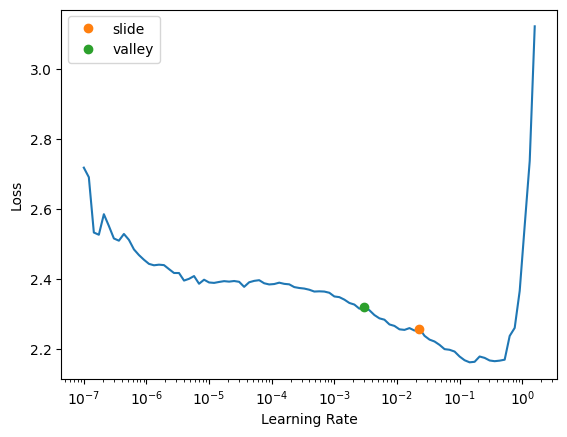

In [58]:
lr_min, lr_steep = learner.lr_find(suggest_funcs=(
    slide, # suggests a learning rate based on the point where the loss starts to decrease most steeply
    valley # suggests a learning rate based on the point where the loss reaches its lowest value before increasing again
))

print(f"Suggested learning rate (slide): {lr_min}")
print(f"Suggested learning rate (valley): {lr_steep}")
average_lr = (lr_min + lr_steep) / 2
print(f"Average learning rate: {average_lr}")
sugg_alr = round((average_lr*1000),2)
print(f"Suggested ALR: {sugg_alr}e-3")

In [59]:
doc(learner.fit_one_cycle)

In [60]:
learner.fit_one_cycle(n_epoch = 1, lr_max = average_lr, cbs=EarlyStoppingCallback(monitor='accuracy', min_delta=0.1, patience=2)) #Takign the average of suggested slide and valley

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,1.538575,1.380607,0.507056,3.977317,00:19


In [61]:
learner.fit_one_cycle(n_epoch = 100, lr_max = average_lr, cbs=EarlyStoppingCallback(monitor='accuracy', min_delta=0.1, patience=10)) #Takign the average of suggested slide and valley

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,1.510494,1.358229,0.509745,3.889299,00:20
1,1.429856,1.345545,0.506720,3.840281,00:20
2,1.501804,1.336741,0.512433,3.806619,00:20
3,1.435919,1.329756,0.522177,3.780120,00:20
4,1.442279,1.328739,0.519153,3.776277,00:21
5,1.489473,1.323796,0.526882,3.757658,00:20
6,1.462626,1.333809,0.519489,3.795474,00:20
7,1.436908,1.321375,0.526882,3.748570,00:20
8,1.407338,1.350570,0.499328,3.859627,00:20
9,1.470550,1.335715,0.513441,3.802714,00:20


No improvement since epoch 0: early stopping


<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

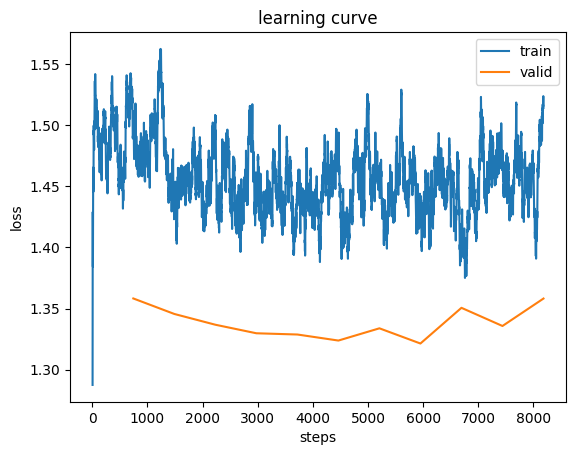

In [62]:
learner.recorder.plot_loss()

In [63]:
learner.save(f"lm-stage-0")

Path('models/lm-stage-0.pth')

**Stage 1**

In [64]:
learner.load(f"lm-stage-0")

In [65]:
learner.unfreeze()

Suggested learning rate (slide): 0.03981071710586548
Suggested learning rate (valley): 0.0002290867705596611
Average learning rate: 0.02001990193821257
Suggested ALR: 20.02e-3


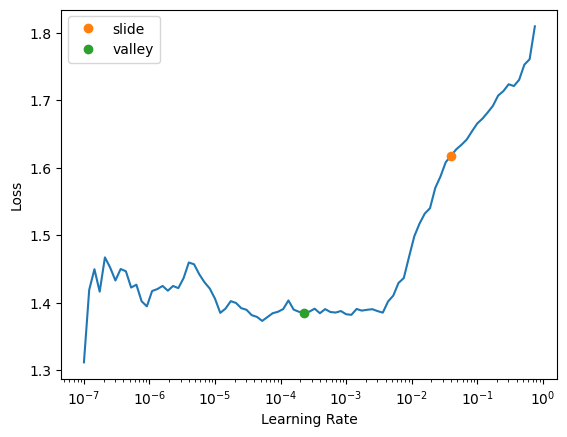

In [66]:
lr_min, lr_steep = learner.lr_find(suggest_funcs=(
    slide, # suggests a learning rate based on the point where the loss starts to decrease most steeply
    valley # suggests a learning rate based on the point where the loss reaches its lowest value before increasing again
))

print(f"Suggested learning rate (slide): {lr_min}")
print(f"Suggested learning rate (valley): {lr_steep}")
average_lr = (lr_min + lr_steep) / 2
print(f"Average learning rate: {average_lr}")
sugg_alr = round((average_lr*1000),2)
print(f"Suggested ALR: {sugg_alr}e-3")

In [67]:
learner.fit_one_cycle(n_epoch = 100, lr_max = slice(lr_min, lr_steep), cbs=EarlyStoppingCallback(monitor='accuracy', min_delta=0.1, patience=10)) #Takign the average of suggested slide and valley

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,1.279498,1.170988,0.584341,3.225178,00:36
1,1.044296,1.150821,0.593078,3.160787,00:35
2,0.845764,1.234957,0.569556,3.438232,00:35
3,0.647111,1.302939,0.542339,3.680096,00:36
4,0.578778,1.444107,0.535954,4.238068,00:36
5,0.513362,1.500731,0.511089,4.484969,00:35
6,0.538179,1.708377,0.485887,5.519994,00:35
7,0.515914,1.787402,0.470430,5.973912,00:35
8,0.613707,1.774469,0.483535,5.897151,00:36
9,0.640218,1.964807,0.457325,7.133534,00:35


No improvement since epoch 0: early stopping


<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

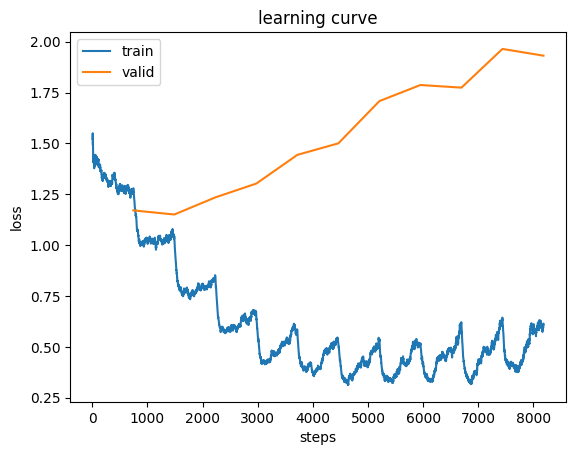

In [68]:
learner.recorder.plot_loss()

**Train loss is decreasing but the validation loss is increasing resulting in huge gap between the two curves, Hence the model is overfitting!**

In [69]:
learner.save(f"lm-stage-1")

Path('models/lm-stage-1.pth')

In [70]:
learner.model

SequentialRNN(
  (0): SentenceEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(15808, 400, padding_idx=1)
      (encoder_dp): EmbeddingDropout(
        (emb): Embedding(15808, 400, padding_idx=1)
      )
      (rnns): ModuleList(
        (0): WeightDropout(
          (module): LSTM(400, 1152, batch_first=True)
        )
        (1): WeightDropout(
          (module): LSTM(1152, 1152, batch_first=True)
        )
        (2): WeightDropout(
          (module): LSTM(1152, 400, batch_first=True)
        )
      )
      (input_dp): RNNDropout()
      (hidden_dps): ModuleList(
        (0-2): 3 x RNNDropout()
      )
    )
  )
  (1): PoolingLinearClassifier(
    (layers): Sequential(
      (0): LinBnDrop(
        (0): BatchNorm1d(1200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (1): Dropout(p=0.2, inplace=False)
        (2): Linear(in_features=1200, out_features=50, bias=False)
        (3): ReLU(inplace=True)
      )
      (1): LinBnDrop(
        (0): B

In [71]:
learner.save_encoder(f"lm-encoder-finetuned-with-earlyStopping")